## Question : 
## create a model that will help predict if a person has a high probablity of paying the loan back 

## Data :
We will use lending data from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full.

The data set contains the following features:

--> credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

--> purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

--> int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

--> installment: The monthly installments owed by the borrower if the loan is funded.

--> log.annual.inc: The natural log of the self-reported annual income of the borrower.

--> dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

--> fico: The FICO credit score of the borrower.

--> days.with.cr.line: The number of days the borrower has had a credit line.

--> revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

--> revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

--> inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

--> delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

--> pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Importing Libraries & getting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('dataset/dtprojdata.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

## EDA

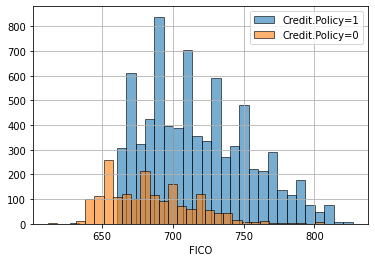

In [6]:
data[data['credit.policy'] == 1]['fico'].hist(bins=30, alpha=0.6, label='Credit.Policy=1', ec='black')
data[data['credit.policy'] == 0]['fico'].hist(bins=30, alpha=0.6, label='Credit.Policy=0', ec='black')

plt.legend()
plt.xlabel('FICO')
plt.show()


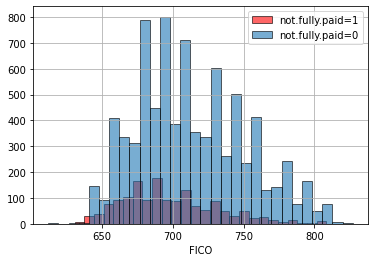

In [7]:
data[data['not.fully.paid'] == 1]['fico'].hist(bins=30, alpha=0.6, label='not.fully.paid=1', color='red',ec='black')
data[data['not.fully.paid'] == 0]['fico'].hist(bins=30, alpha=0.6, label='not.fully.paid=0', ec='black')

plt.legend()
plt.xlabel('FICO')
plt.show()


<AxesSubplot:xlabel='purpose', ylabel='count'>

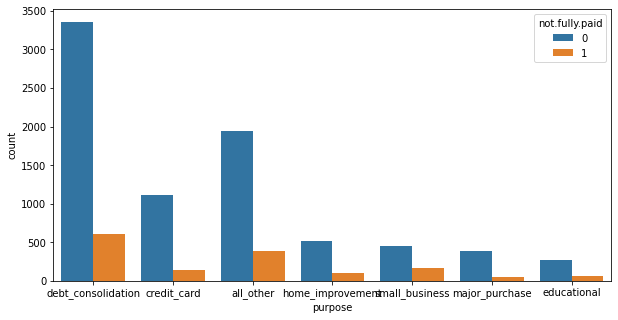

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['purpose'], hue=data['not.fully.paid'])

## Handling Categorical Variables

In [9]:
categ = ['purpose']
data = pd.get_dummies(data ,columns=categ ,drop_first=True)

data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [10]:
data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

## Selecting Features

In [11]:
X = data.drop('not.fully.paid' ,axis=1)
y = data['not.fully.paid']

X.shape, y.shape

((9578, 18), (9578,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6417, 18), (3161, 18), (6417,), (3161,))

# Model Building

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [14]:
y_pred_dt = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

print('Accuracy of model :', accuracy_score(y_test, y_pred_dt))
print('Classification Report :\n ', classification_report(y_test, y_pred_dt))


Accuracy of model : 0.7393229990509332
Classification Report :
                precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.23      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



<AxesSubplot:>

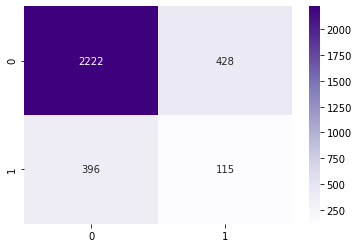

In [16]:
confusion = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(confusion, annot=True, cmap='Purples',fmt='.4g')

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
model.fit(X_train ,y_train)

RandomForestClassifier()

In [18]:
y_pred_rf = model.predict(X_test)

In [19]:
print('Accuracy of model :', accuracy_score(y_test, y_pred_rf))
print('Classification Report :\n ', classification_report(y_test, y_pred_rf))


Accuracy of model : 0.8377095855741854
Classification Report :
                precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.44      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.64      0.51      0.47      3161
weighted avg       0.78      0.84      0.77      3161



<AxesSubplot:>

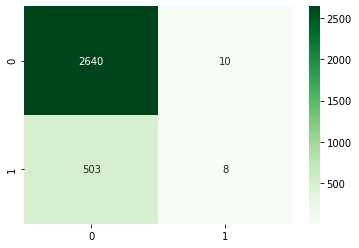

In [20]:
confusion = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='.4g')

## Model Evaluation

In [21]:
models = pd.DataFrame({
    'Model used':['Decision Tree' ,'Random Forest'],
    'Accuracy Score' : [
        accuracy_score(y_test ,y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

models.sort_values(by='Accuracy Score' ,ascending=False)

,Model used,Accuracy Score
1,Random Forest,0.837710
0,Decision Tree,0.739323
